In [2]:
import pandas as pd

# Define o caminho para o arquivo
caminho_arquivo = 'tesouro.csv'  

# Lê os primeiros 100 mil registros
df_amostra = pd.read_csv(
    caminho_arquivo,
    sep=';',
    encoding='latin1'
)

# Mostra as primeiras linhas
df_amostra.head(5)


,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
60398719,60573279,28/04/2025,Solteiro(a),F,OUTROS,23,PA,SANTAREM,BRASIL,A,N
60398720,60573280,28/04/2025,Solteiro(a),M,TRABALHADOR AUTÔNOMO,29,MG,CAPARAO,BRASIL,A,N
60398721,60573281,28/04/2025,Solteiro(a),F,OUTROS,43,PA,PARAUAPEBAS,BRASIL,A,N
60398722,60573282,28/04/2025,Desquitado(a),M,TRABALHADOR AUTÔNOMO,36,MG,CONCEICAO DO MATO DENTRO,BRASIL,A,N
60398723,60573283,28/04/2025,Solteiro(a),M,OUTROS,45,BA,FEIRA DE SANTANA,BRASIL,A,N


In [2]:
df_amostra.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398724 entries, 0 to 60398723
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Codigo do Investidor  int64 
 1   Data de Adesao        object
 2   Estado Civil          object
 3   Genero                object
 4   Profissao             object
 5   Idade                 int64 
 6   UF do Investidor      object
 7   Cidade do Investidor  object
 8   Pais do Investidor    object
 9   Situacao da Conta     object
 10  Operou 12 Meses       object
dtypes: int64(2), object(9)
memory usage: 5.0+ GB


In [3]:
#Ver tipos únicos por coluna
for col in df_amostra.columns:
    print(f"{col}: {df_amostra[col].nunique()} valores únicos")


Codigo do Investidor: 32202875 valores únicos
Data de Adesao: 8254 valores únicos
Estado Civil: 10 valores únicos
Genero: 3 valores únicos
Profissao: 159 valores únicos
Idade: 126 valores únicos
UF do Investidor: 28 valores únicos
Cidade do Investidor: 14849 valores únicos
Pais do Investidor: 1 valores únicos
Situacao da Conta: 2 valores únicos
Operou 12 Meses: 2 valores únicos


In [4]:
#tratar colunas úteis como idade, profissão, gênero
# Converte idade para número
df_amostra['Idade'] = pd.to_numeric(df_amostra['Idade'], errors='coerce')

# Remove espaços extras das colunas
df_amostra.columns = df_amostra.columns.str.strip()

# Visualiza estatísticas
df_amostra['Idade'].describe()


count    6.039872e+07
mean     3.686519e+01
std      1.245424e+01
min      0.000000e+00
25%      2.800000e+01
50%      3.500000e+01
75%      4.400000e+01
max      1.250000e+02
Name: Idade, dtype: float64

In [5]:
media_idade_por_estado = df_amostra.groupby('UF do Investidor')['Idade'].mean().sort_values(ascending=False)
print(media_idade_por_estado)


UF do Investidor
      48.000000
DF    40.530234
RJ    38.950832
SP    37.976090
RS    36.894565
ES    36.686696
PR    36.450654
MG    36.146663
SC    36.089193
PE    35.869699
RN    35.763548
BA    35.690066
MS    35.393312
SE    35.387107
PB    35.322085
GO    34.977667
CE    34.918163
AL    34.912220
AM    34.910276
AP    34.546514
PA    34.352723
MT    34.173093
RO    34.069971
PI    33.932355
RR    33.897291
AC    33.868890
MA    33.683807
TO    33.594497
Name: Idade, dtype: float64


In [7]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuste de estilo
sns.set(style="whitegrid")

# Exibe os gráficos no notebook
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


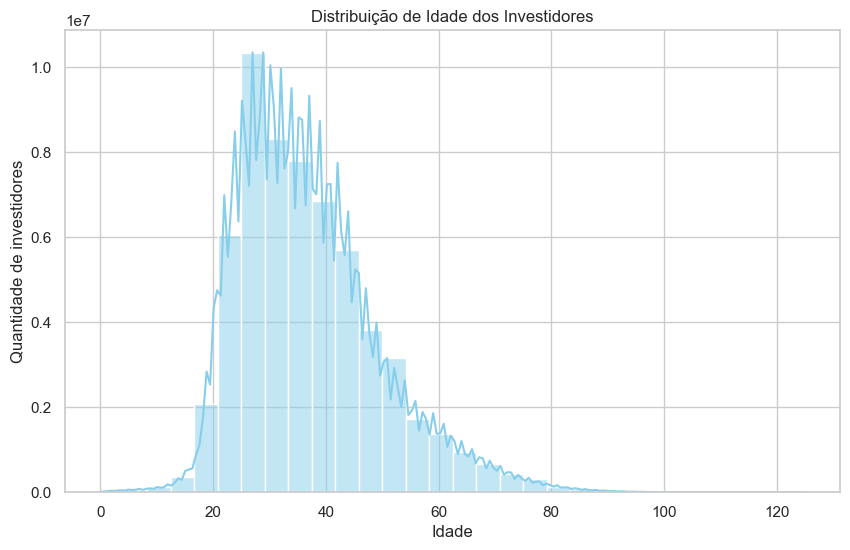

In [8]:
#Distribuição da idade dos investidores
plt.figure(figsize=(10,6))
sns.histplot(df_amostra['Idade'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Idade dos Investidores')
plt.xlabel('Idade')
plt.ylabel('Quantidade de investidores')
plt.show()


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12956\873249551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_amostra, x='UF do Investidor', order=df_amostra['UF do Investidor'].value_counts().index, palette='viridis')


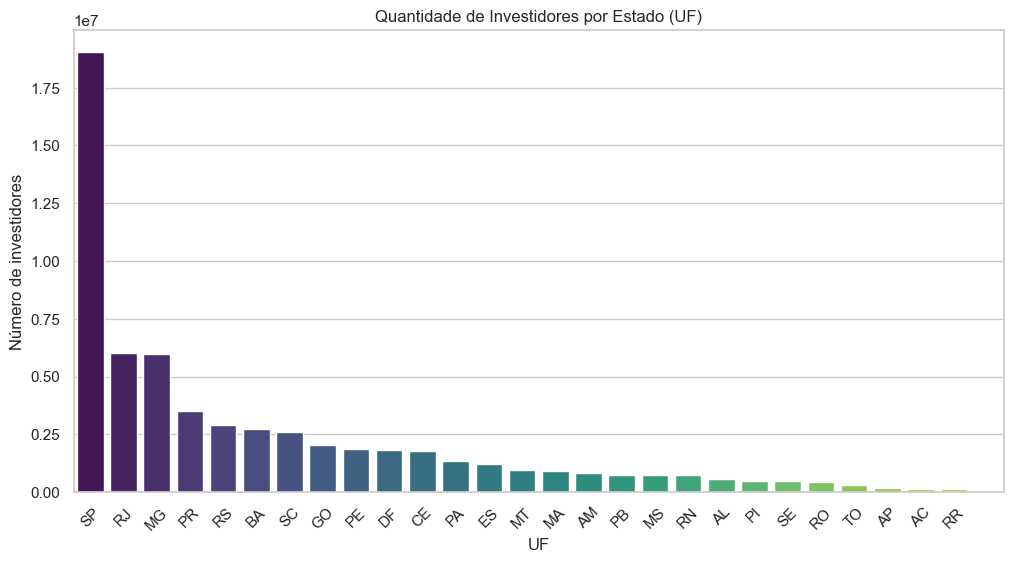

In [9]:
#Quantidade de investidores por UF
plt.figure(figsize=(12,6))
sns.countplot(data=df_amostra, x='UF do Investidor', order=df_amostra['UF do Investidor'].value_counts().index, palette='viridis')
plt.title('Quantidade de Investidores por Estado (UF)')
plt.xlabel('UF')
plt.ylabel('Número de investidores')
plt.xticks(rotation=45)
plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12956\2889610825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_amostra, x='Genero', palette='pastel')


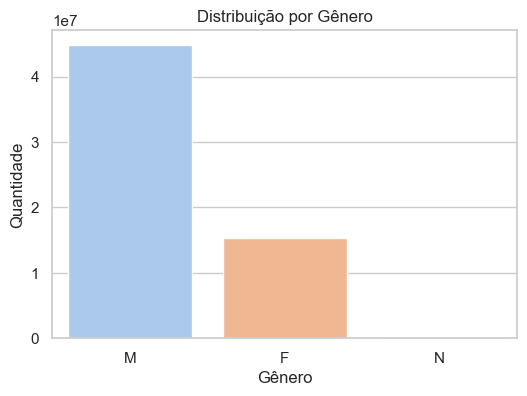

In [10]:
#gênero dos investidores
plt.figure(figsize=(6,4))
sns.countplot(data=df_amostra, x='Genero', palette='pastel')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12956\2945861518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profissoes.values, y=top_profissoes.index, palette='coolwarm')


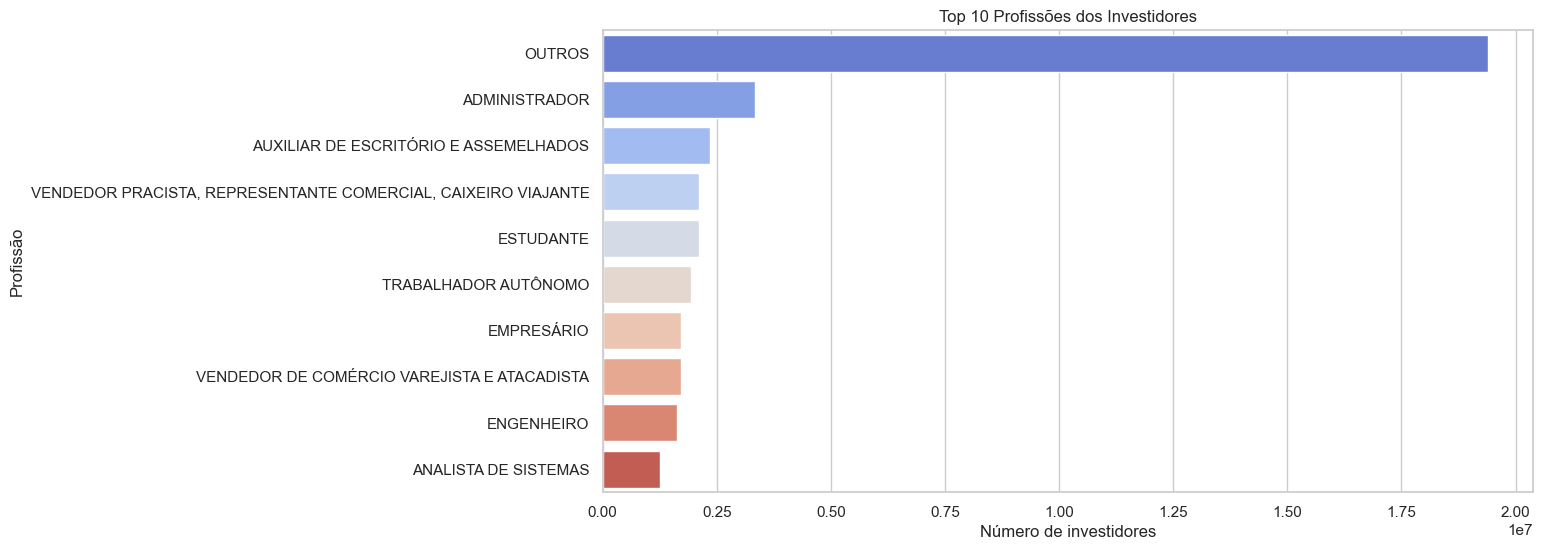

In [11]:
#top10 profissoes
plt.figure(figsize=(12,6))
top_profissoes = df_amostra['Profissao'].value_counts().head(10)
sns.barplot(x=top_profissoes.values, y=top_profissoes.index, palette='coolwarm')
plt.title('Top 10 Profissões dos Investidores')
plt.xlabel('Número de investidores')
plt.ylabel('Profissão')
plt.show()
